In [2]:
import tensorflow as tf
import os
import zipfile

In [6]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import random

In [3]:
DESIRED_ACCURACY = 0.999

!wget --no-check-certificate "https://storage.googleapis.com/laurencemoroney-blog.appspot.com/happy-or-sad.zip"  -O "/datadrive/dataForSamplePrograms/happy-or-sad.zip"

zip_ref = zipfile.ZipFile("/datadrive/dataForSamplePrograms/happy-or-sad.zip", 'r')
zip_ref.extractall("/datadrive/dataForSamplePrograms/h-or-s")
zip_ref.close()

--2020-06-12 10:02:26--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/happy-or-sad.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.4.48, 2607:f8b0:4009:811::2010
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.4.48|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2670333 (2.5M) [application/zip]
Saving to: ‘/datadrive/dataForSamplePrograms/happy-or-sad.zip’

/datadrive/dataForS 100%[===================>]   2.55M  11.0MB/s    in 0.2s    

2020-06-12 10:02:26 (11.0 MB/s) - ‘/datadrive/dataForSamplePrograms/happy-or-sad.zip’ saved [2670333/2670333]



In [5]:
happy_imgs = os.listdir("/datadrive/dataForSamplePrograms/h-or-s/happy/")
sad_imgs = os.listdir("/datadrive/dataForSamplePrograms/h-or-s/sad/")

happy2-00.png


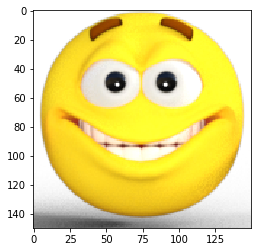

In [14]:
filename = random.choice(happy_imgs)
img = mpimg.imread("/datadrive/dataForSamplePrograms/h-or-s/happy/" + filename )
plt.imshow(img)
print(filename)

sad2-14.png


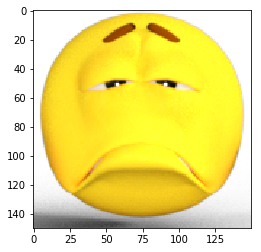

In [15]:
filename = random.choice(sad_imgs)
img = mpimg.imread("/datadrive/dataForSamplePrograms/h-or-s/sad/" + filename )
plt.imshow(img)
print(filename)

In [19]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0

In [22]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
        '/datadrive/dataForSamplePrograms/h-or-s/',  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 300x300
        batch_size=128,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

Found 80 images belonging to 2 classes.


In [27]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('acc')>0.999):
      print("\nReached 99.9% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()


model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.RMSprop(lr=0.001),
              metrics=['accuracy'])

model.fit(train_generator,
      steps_per_epoch=8,  
      epochs=15,
      verbose=1,callbacks=[callbacks])

Epoch 1/15
8/8 [==============================] - 4s 508ms/step - loss: 0.5134 - acc: 0.9375
Epoch 2/15
7/8 [=========================>....] - ETA: 0s - loss: 2.3694e-06 - acc: 1.0000
Reached 99.9% accuracy so cancelling training!
8/8 [==============================] - 3s 434ms/step - loss: 2.3457e-06 - acc: 1.0000
